**Generate 2d dataset**

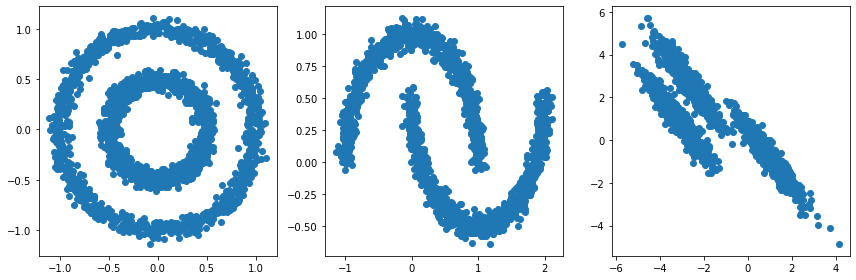

In [1]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
import numpy as np

n_samples = 2000
np.random.seed(0)
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

sample_datasets = [noisy_circles, noisy_moons, aniso]

figsize = 4
plt.figure(figsize=(figsize*len(sample_datasets),figsize))
for i, dataset in enumerate(sample_datasets):
  plt.subplot(1, len(sample_datasets), i+1)
  plt.scatter(dataset[0][:, 0], dataset[0][:, 1])
  plt.tight_layout()

plt.show()

**Clustering**

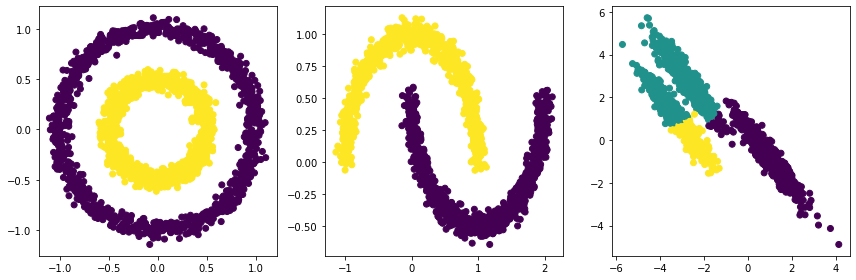

In [2]:
figsize = 4
plt.figure(figsize=(figsize*len(sample_datasets),figsize))
distance_threshold = [0.2, 0.2, 40]
linkage = ['single', 'single', 'ward'] # single complete ward average

for i, dataset in enumerate(sample_datasets):
  X = dataset[0]
  y_pred = cluster.AgglomerativeClustering(n_clusters=None, distance_threshold=distance_threshold[i], linkage=linkage[i]).fit_predict(X)
  plt.subplot(1, len(sample_datasets), i+1)
  plt.scatter(dataset[0][:, 0], dataset[0][:, 1], c=y_pred)
  plt.tight_layout()

plt.show()

**Evaluation**

In [5]:
from evaluation import evaluate_clustering
evaluate_clustering(y, y_pred)

Rand Index: 0.810986, NMI: 0.678969, F-measure: 0.740376
